In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap

In [42]:
from google.colab import files
uploaded=files.upload()

Saving Iris.csv to Iris (1).csv


In [9]:
df=pd.read_csv('Iris.csv')

In [12]:
print(df.shape)
print(df.info())
print(df.isnull().sum())
print(df.head())

(150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.

In [20]:
df.drop(columns=["Id"], errors="ignore", inplace=True)
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
print(df.head())
print(df.tail())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2


In [22]:
x=df.drop('Species', axis=1).values
y=df['Species']

In [26]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.3, random_state=42)


In [39]:
k_values=[1,3,5,7]
for k in k_values:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



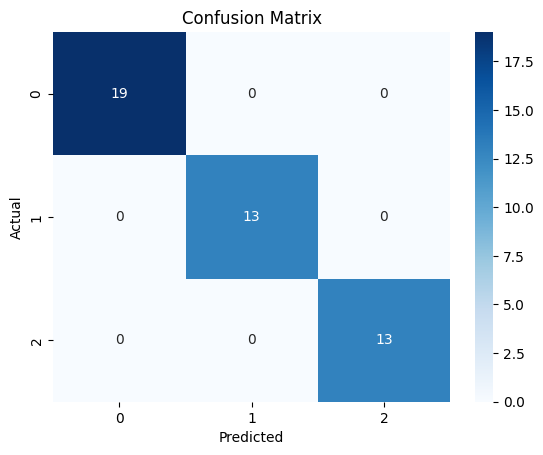

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [57]:
x_2D = df[['SepalLengthCm', 'SepalWidthCm']].values
y = df['Species'].values


scaler_2D = StandardScaler()
x_2D_scaled = scaler_2D.fit_transform(x_2D)


x_train_2D, x_test_2D, y_train_2D, y_test_2D = train_test_split(x_2D_scaled, y, test_size=0.3, random_state=42)


model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train_2D, y_train_2D)

KNeighborsClassifier(n_neighbors=3)

In [58]:
h = 0.02
x_min, x_max = x_2D_scaled[:, 0].min() - 1, x_2D_scaled[:, 0].max() + 1
y_min, y_max = x_2D_scaled[:, 1].min() - 1, x_2D_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

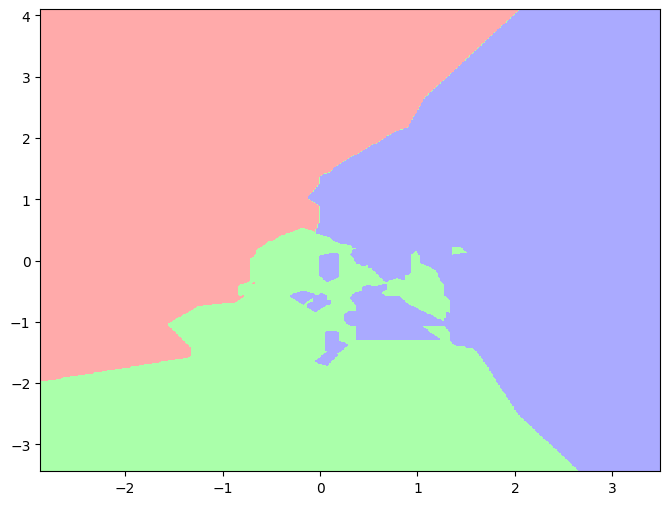

In [59]:
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']
plt.contourf(xx, yy, z, cmap=cmap_light)

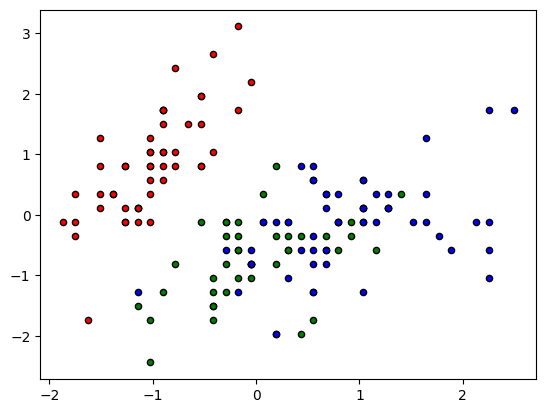

In [60]:
for i, color in zip(range(3), cmap_bold):
    plt.scatter(x_2D_scaled[y == i, 0], x_2D_scaled[y == i, 1],
                c=color, label=le.classes_[i], edgecolor='k', s=20)


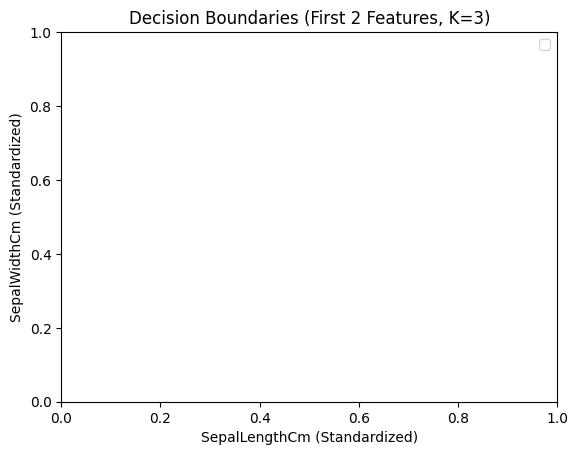

In [61]:
plt.xlabel('SepalLengthCm (Standardized)')
plt.ylabel('SepalWidthCm (Standardized)')
plt.title('Decision Boundaries (First 2 Features, K=3)')
plt.legend()
plt.show()